In [1]:
#Dynamic Mode Decomposition
# Step 1: Import required libraries
import numpy as np	
import matplotlib.pyplot as plt

Shape of u_data: (500, 64, 64)
Shape of v_data: (500, 64, 64)


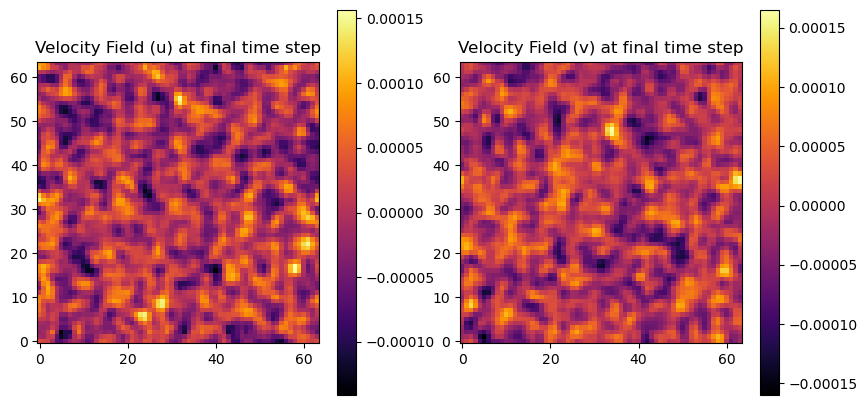

In [3]:
# Step 2: Load KolSol-generated data (velocity fields)
u_data = np.load('u_data.npy')  # X-velocity component
v_data = np.load('v_data.npy')  # Y-velocity component

# Print the shape of the loaded data
print(f"Shape of u_data: {u_data.shape}")
print(f"Shape of v_data: {v_data.shape}")

# Visualize the velocity field at the final time step
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Velocity Field (u) at final time step")
plt.imshow(u_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Velocity Field (v) at final time step")
plt.imshow(v_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.show()

In [5]:
u_reshaped = u_data.reshape(u_data.shape[0], -1).T
v_reshaped = v_data.reshape(v_data.shape[0], -1).T

In [7]:
from pydmd import DMD

# Applying DMD to the reshaped data
dmd_u = DMD(svd_rank=10)  # Adjust the SVD rank if needed
dmd_v = DMD(svd_rank=10)

dmd_u.fit(u_reshaped)
dmd_v.fit(v_reshaped)

# Retrieve the DMD modes and eigenvalues
modes_u = dmd_u.modes
modes_v = dmd_v.modes
eigenvalues_u = dmd_u.eigs
eigenvalues_v = dmd_v.eigs

E:\Anaconda\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 4.336502211765585e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
E:\Anaconda\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 1.761745067902282e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


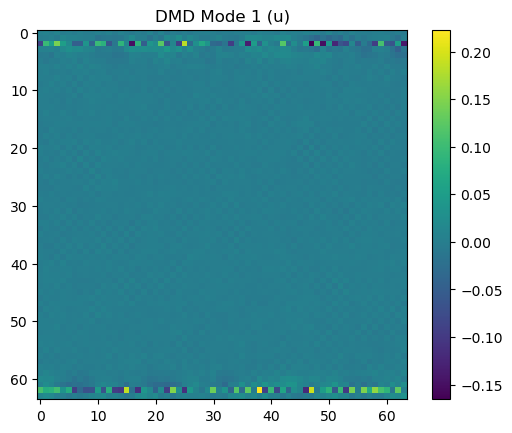

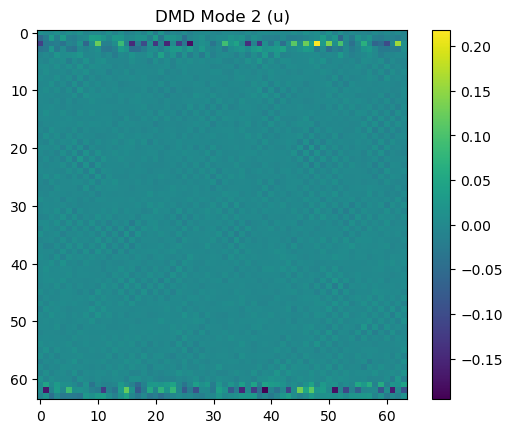

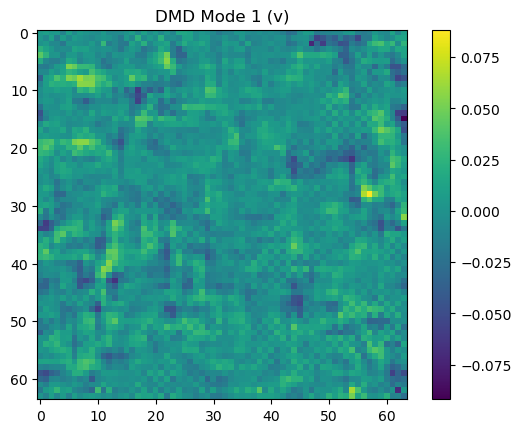

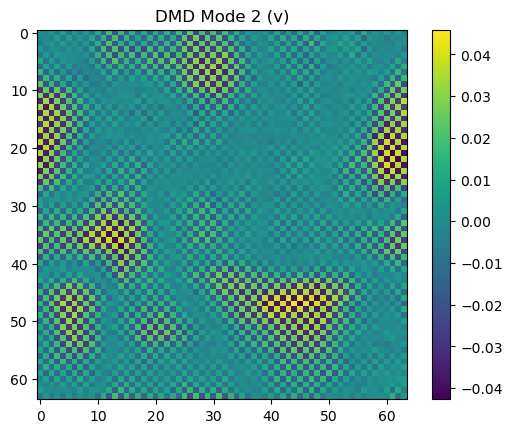

In [9]:
# Visualize the first few DMD modes (e.g., Mode 1, Mode 2, etc.)
import matplotlib.pyplot as plt

# Plot the real part of the first mode for u_data
plt.imshow(modes_u[:, 0].real.reshape(u_data.shape[1], u_data.shape[2]), cmap='viridis')
plt.colorbar()
plt.title('DMD Mode 1 (u)')
plt.show()

# Plot the real part of the second mode for u_data
plt.imshow(modes_u[:, 1].real.reshape(u_data.shape[1], u_data.shape[2]), cmap='viridis')
plt.colorbar()
plt.title('DMD Mode 2 (u)')
plt.show()

# Plot the real part of the first mode for v_data
plt.imshow(modes_v[:, 0].real.reshape(v_data.shape[1], v_data.shape[2]), cmap='viridis')
plt.colorbar()
plt.title('DMD Mode 1 (v)')
plt.show()

# Plot the real part of the second mode for v_data
plt.imshow(modes_v[:, 1].real.reshape(v_data.shape[1], v_data.shape[2]), cmap='viridis')
plt.colorbar()
plt.title('DMD Mode 2 (v)')
plt.show()